<center><img src='https://drive.google.com/uc?id=1PioHCAlQTt8LWChoMysPErSOrxOfAW0R'></center>

**AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020**

---
<center>
<h1>Przetwarzanie multimediów w systemach decyzyjnych</br>Informatyka</br>specjalność: uczenie maszynowe

Autor: Przemysław Rośleń</br>

9 grudnia 2021
</center>
<h3>Interpretowanie modeli uczenia maszynowego, cz. 2</h2>
                  

# Wprowadzenie

W ramach laboratorium kontynuowane jest praktyczne zapoznanie z metodami i możliwościami **interpretacji modeli uczenia maszynowego**. Temat poprzedni poruszał zagadnienia przede wszystkim dedykowane sieciom neuronowym, modelom w których zapewniony jest dostęp do wewnętrznych parametrów, wag, konfiguracji.

Niniejsze laboratorium ma na celu zapoznać z uniwersalnym algorytmem interpretacji, niezależnym od stosowanego modelu uczenia maszynowego: SHAP - addytywne wyjaśnienia Shapley’a (ang. *SHapley Additive exPlanations*), w którym każdy atrybut (feature) przypisywaną ma wartość wagi dla danej predykcji modelu, wyjaśniając w jaki sposób atrybut wpływa na odpowiedź modelu.

Celem laboratorium jest:
- zapoznanie się z metodą interpretacji modeli, sposobami i znaczeniem wizualizacji wyników
- wykonanie samodzielnie odczytu własnego zbioru, wytrenowania modelu i wizualizacji wartości SHAP
- opisanie wniosków z interpretacji
- zapoznanie się ze sposobem interpretacji klasyfikatorów obrazów

# Wymagania wstępne

Wykonanie laboratorium należy rozpocząć od **przypomnienia zagadnień z wykładów o interpretacji sieci neuronowych oraz innych modeli uczenia maszynowego**.

W zadaniach wykorzystywane są biblioteki SHAP - addytywne wyjaśnienia Shapleya oraz InterpretML, zestaw wielu metod. Dokumentacja dostępna jest pod adresami:

https://shap.readthedocs.io/en/latest/index.html

https://github.com/interpretml/interpret




# Przygotowanie środowiska

Instalowana jest biblioteka interpretML, która zawiera algorytmy do interpretowania modeli dwojakiego typu: 1) o dostępnych wewnętrznych parametrach i wagach (szklana skrzynka - ang. *glassbox*) oraz 2) modeli dowolnych, których wewnętrzne parametry mogą pozostawać nieznane w całym procesie interpretacji (czarna skrzynka - ang. *blackbox*).

Metody pierwszej grupy to:
- Explainable Boosting
- Decision Tree
- Decision Rule List
- Linear/Logistic Regression

Metody drugiej grupy to:
- SHAP Kernel Explainer
- LIME
- Morris Sensitivity Analysis
- Partial Dependence



In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.w

In [ ]:
#importowanie bibliotek
import pandas as pd
import shap
import sklearn
import cv2
import interpret
import numpy as np



# Interpretacja modelu liniowego

Model liniowy pierwszego rzędu, $y = w_1x_1+w_2x_2+...$, może być w prosty sposób interpretowany - dla wyniku $y$ największe znaczenie ma atrybut $x_i$ o największej wadze $w_i$.

Choć zależność ta jest oczywista, SHAP w takim wypadku dostarcza użytecznych narzędzi wizualizacji.

In [ ]:
X,y = shap.datasets.diabetes()
X100 = shap.utils.sample(X, 100) #przykładowe 100 próbek, przydatne w 'przekrojowych' obliczeniach, szybkiej charakterystyce zbioru

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

Powyżej wczytano dane `diabetes`, których fragment jest pokazany poniżej.

In [ ]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Wytrenowany powyżej model jest wprost gotowy do interpretacji, gdyż współczynniki $w_i$ oznaczają jak ważne są dla wyniku $i$-te atrybuty $x_i$.

In [ ]:
print(X.shape[1], "współczynników modelu liniowego:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(2))

10 współczynników modelu liniowego:

age = -10.01
sex = -239.82
bmi = 519.85
bp = 324.38
s1 = -792.18
s2 = 476.74
s3 = 101.04
s4 = 177.06
s5 = 751.27
s6 = 67.63


Z powodu różnic między wagami brak jest dopasowania skali współczynnika $w_i$ i istotności atrybutu, konieczna jest normalizacja - osiągana przez obserwację wpływu na wykresach PDP (ang. *partial dependence plot*).

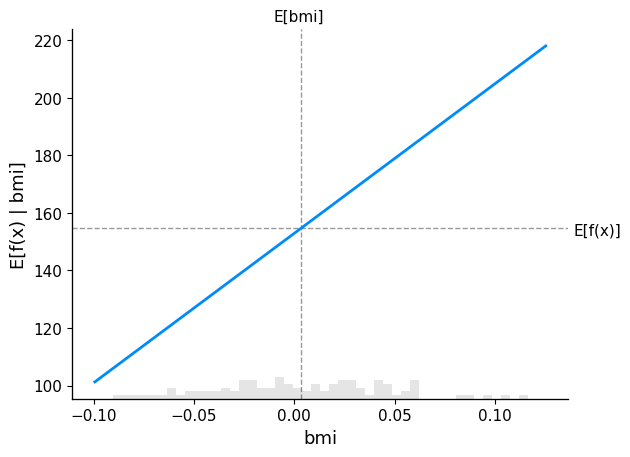

In [ ]:
feature = "bmi"
shap.plots.partial_dependence(
    feature, model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Docelowo, pełne wyjaśnienie uzyskuje się stosując funkcję `shap.Explainer`. W celu skrócenia obliczeń użyte jest tylko 100 próbek (macierz `X100`).

In [ ]:
# obliczenie współczynników SHAP dla modelu
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

Na poniższym wykresie wartość **współczynnika istotności - SHAP** to czerwona linia. W sposób graficzny przedstawia ona wyjaśnienie, dlaczego dla zadanej wartości atrybutu (na osi poziomej), różnej od jego wartości oczekiwanej $E[bmi]$, otrzymuje się wynik modelu $E[f(x) | bmi]$ inny od wartości oczekiwanej $E[f(x)]$.

W poniższym przykładzie modyfikować można numer próbki `sample_ind`, obserwując wyjaśnienia dla różnych atrybutów `feature = "nazwa"`

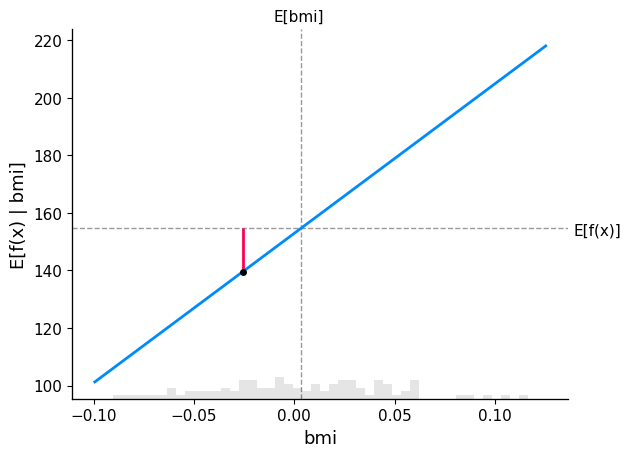

In [ ]:
sample_ind = 14
feature = "bmi"
shap.partial_dependence_plot(
    feature, model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

Wykres PDP oraz współczynniki SHAP są ściśle powiązane dla modelu liniowego, gdy każdy atrybut w modelu może być analizowany niezależnie od innych, a ostatecznie wpływy atrybutów są sumowane.

Sprawdzić można, że średnia wartość (estymata wartości oczekiwanej) jest równa tej, wskazanej na wykresie dla zadanego `feature` oraz jaka jest wartość atrybutu dla danej próbki i decyzja modelu.

In [ ]:
print("Wartość średnia dla atrybutu:", feature, "=", np.mean(X100[:][feature]))

Wartość średnia dla atrybutu: bmi = 0.003171010906955865


In [ ]:
X[sample_ind:sample_ind+1]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
14,0.045341,-0.044642,-0.025607,-0.012556,0.017694,-0.000061,0.081775,-0.039493,-0.031988,-0.075636


In [ ]:
print("Decyzja dla próbki nr",sample_ind, "=", y[sample_ind])

Decyzja dla próbki nr 14 = 118.0


Obecnie obserwowany wynik na wykresie nie jest równy decyzji, gdyż jest ona zależna od wszystkich atrybutów jednocześnie. Powyższy wykres przedstawia wyłącznie kontrybucję (wpływ) wartości pojedynczego analizowanego atrybutu na wynik.

Każda wartość atrybutu różna od średniej $E[x_i]$ ma niezerową wartość współczynnika SHAP. Im bardziej $x_i$ jest od średniej oddalone, tym większą posiada wartość bezwzględną współczynnika SHAP. Zaobserwować można to na wykresach dla wszystkich atrybutów.

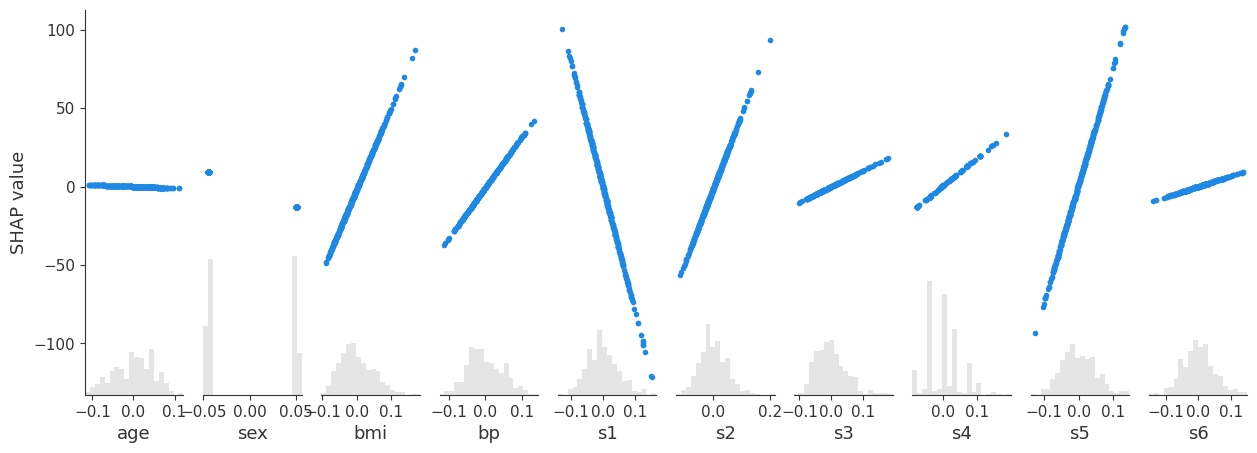

In [ ]:
shap.plots.scatter(shap_values)

## Zagadnienie do dyskusji

Czy nachylenie tej charakterystyki `scatter` pozwala wyciągnąć jakieś przydatne wnioski?

Podpowiedź: tak.

Do studenta należy próba sformułowania - "jakie?"

Na podstawie nachylenia można wywnioskować jak duży wpływ na wartość współczynnika SHAP ma dla danego atrybutu wartość tego atrybutu dla danej próbki. W przypadku poziomych wykresów wpływ jest zbliżony dla wszystkich wartości w dziedzinie atrybutu. W przypadku pionowych wykresów jest duży rozstrzał między wartościami SHAP w zależności od wartości danego atrybutu badanej próbki.

# Wpływ atrybutów na wynik - interpretacja `waterfall`

Wynik klasyfikatora to wartość oczekiwana (średnia wartość wyjścia modelu) plus **wartość każdego współczynnika SHAP**, otrzymanego dla zadanej $x_i$ wartości każdego atrybutu.

Graficznie jest to prezentowane w formie wykresu `waterfall`.

Rozpoczynając od dołu wykresu waterfall:
- wartość $E[f(X)]$ (wielka litera $X$ oznacza reprezentację całego zbioru, $E[]$ to oczekiwana wartość odpowiedzi)
- dodawanie współczynników SHAP dla każdego atrybutu (od najmniej ważnych)
- w górę, aż do współczynników najważniejszych
- ostatecznie suma wyniesie $f(x)$, czyli równa jest rzeczywistej odpowiedzi modelu dla próbki x (mała litera `x` to jedna próbka).

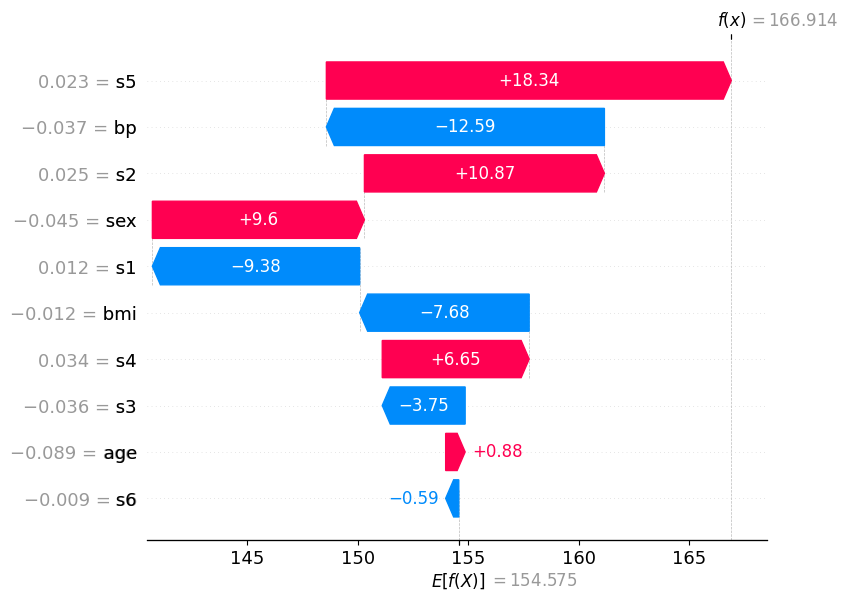

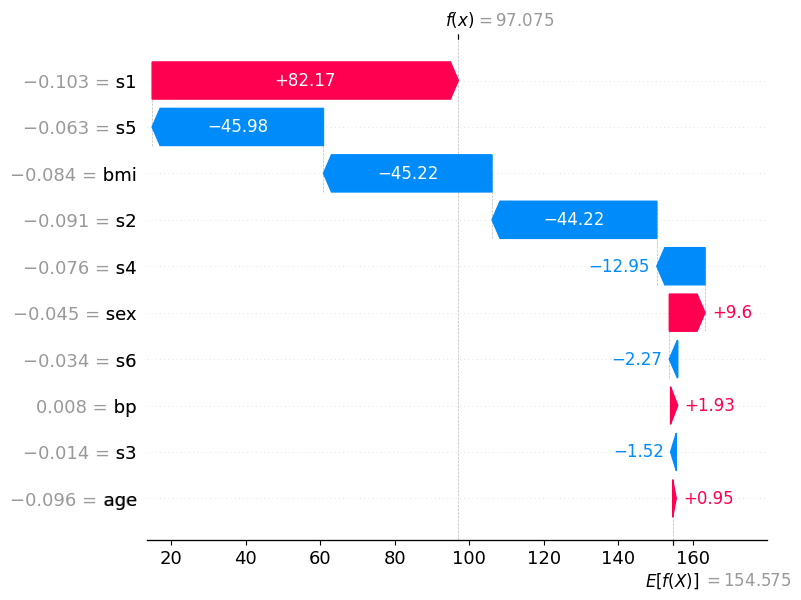

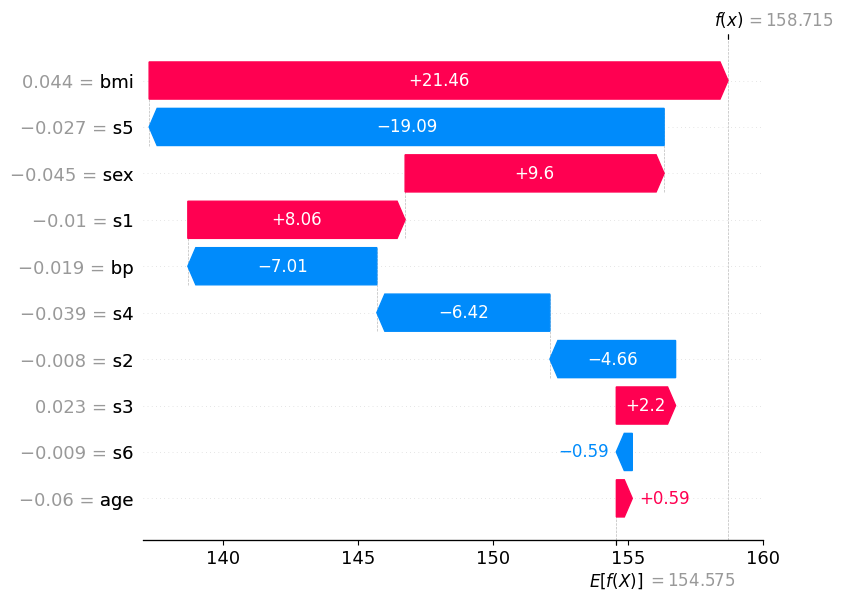

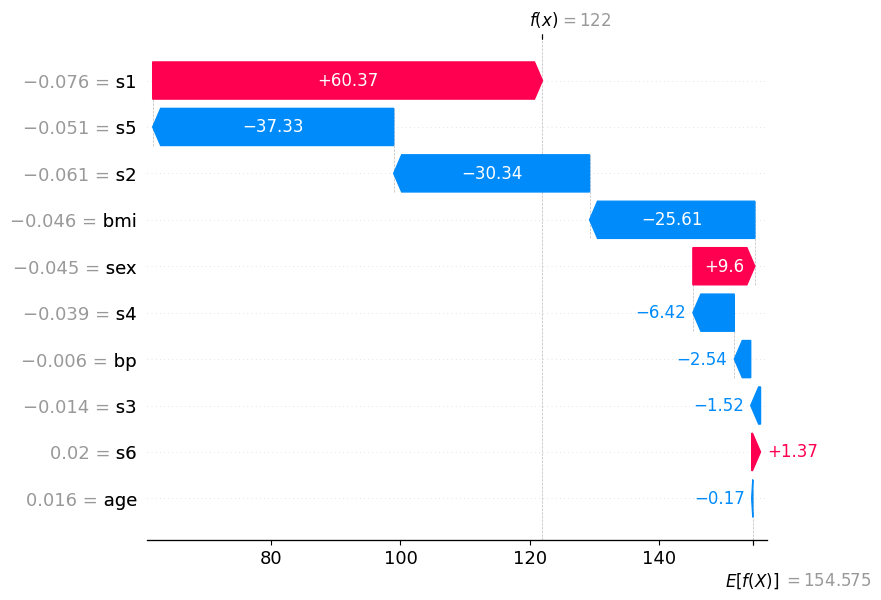

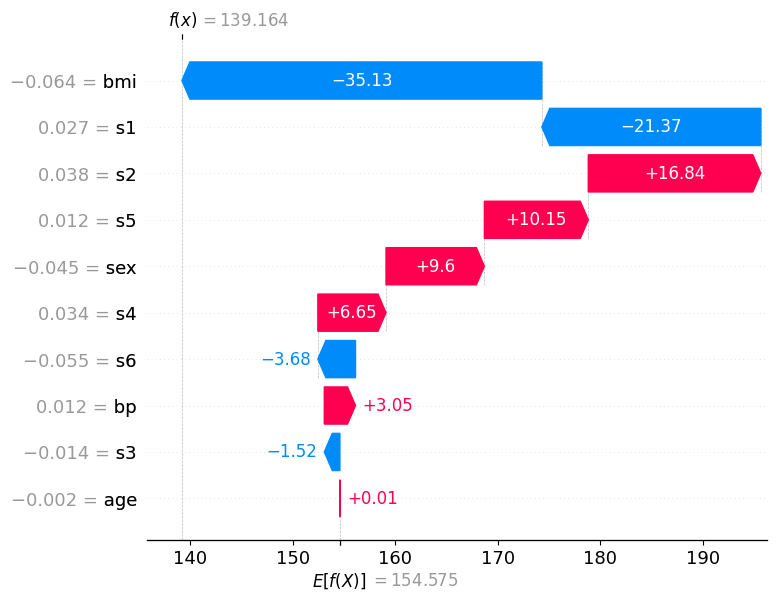

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
sample_ind=3
shap.plots.waterfall(shap_values[sample_ind], max_display=10)
sample_ind=10
shap.plots.waterfall(shap_values[sample_ind], max_display=10)
sample_ind=30
shap.plots.waterfall(shap_values[sample_ind], max_display=10)
sample_ind=69
shap.plots.waterfall(shap_values[sample_ind], max_display=10)
sample_ind=99
shap.plots.waterfall(shap_values[sample_ind], max_display=10)

## Zadanie do wykonania

Należy przebadać w powyższym bloku kodu jak wykres ten kształtuje się dla różnych próbek (zmiana `sample_ind`).
Swoje obserwacje dla 4-6 różnych próbek skomentować poniżej.

Zbadaliśmy 5 różnych próbek.
Bardzo wpływowe na wynik klasyfikatora okazały się być atrybuty takie jak:
- bmi (1 miejsce w przypadku 2 próbek, 3 miejsce dla 1 próbki)
- s5 (1 miejsce w przypadku 1 próbek, 2 miejsce dla 3 próbek)
- s1 (1 miejsce w przypadku 2 próbek, 2 miejsce dla 1 próbki)

Najmniej istotne okazały się atrybuty:
- age (ostatnie miejsce w przypadku 4 próbek)
- s6 (ostatnie miejsce w przypadku 1 próbki)

# Interpretacja modelu - wykres `beeswarm`

Pomijając szczegóły można uzyskać ogólny graficzny wykres dla wszystkich próbek, typ `beeswarm`.

- Kolejność w pionie – od najistotniejszych (**globalne wyjaśnienie**)
- Oś pozioma – wpływ na wartość decyzji (**lokalne wyjaśnienia**)
- Kolor – bezwzględna wartość atrybutu danej próbki (niska–wysoka)

Ma on taką **zaletę**, że kolejność w pionie związana jest z globalną przydatnością atrybutu dla całego modelu - inaczej niż w `waterfall`, wyświetlanym tylko dla jednej próbki wejściowej, gdzie ta kolejność może być inna.


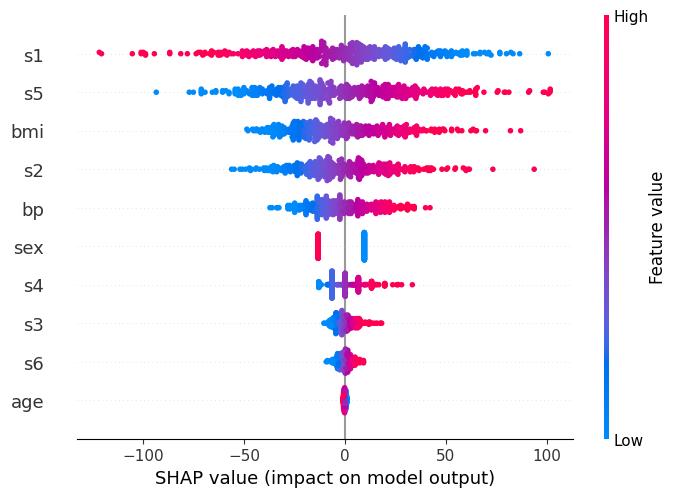

In [ ]:
shap.plots.beeswarm(shap_values)

## Zadanie do wykonania

Należy przygotować nowy kod, zamieścić go poniżej i opisać.

Wymagane elementy: krótki opis własnego zagadnienia i zbioru danych, wnioski z obserwacji wag modelu liniowego, wyliczenia związane z użyciem metod SHAP, wnioski z istotności atrybutów, wnioski z interpretacji całego modelu.

In [ ]:
X,y = shap.datasets.california()
X5000 = shap.utils.sample(X, 5000) #przykładowe 100 próbek, przydatne w 'przekrojowych' obliczeniach, szybkiej charakterystyce zbioru

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)



LinearRegression()

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
print(X.shape[1], "współczynników modelu liniowego:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(2))
explainer = shap.Explainer(model.predict, X5000)
shap_values = explainer(X)

8 współczynników modelu liniowego:

MedInc = 0.44
HouseAge = 0.01
AveRooms = -0.11
AveBedrms = 0.65
Population = -0.0
AveOccup = -0.0
Latitude = -0.42
Longitude = -0.43


ExactExplainer explainer: 20641it [02:56, 111.15it/s]                           


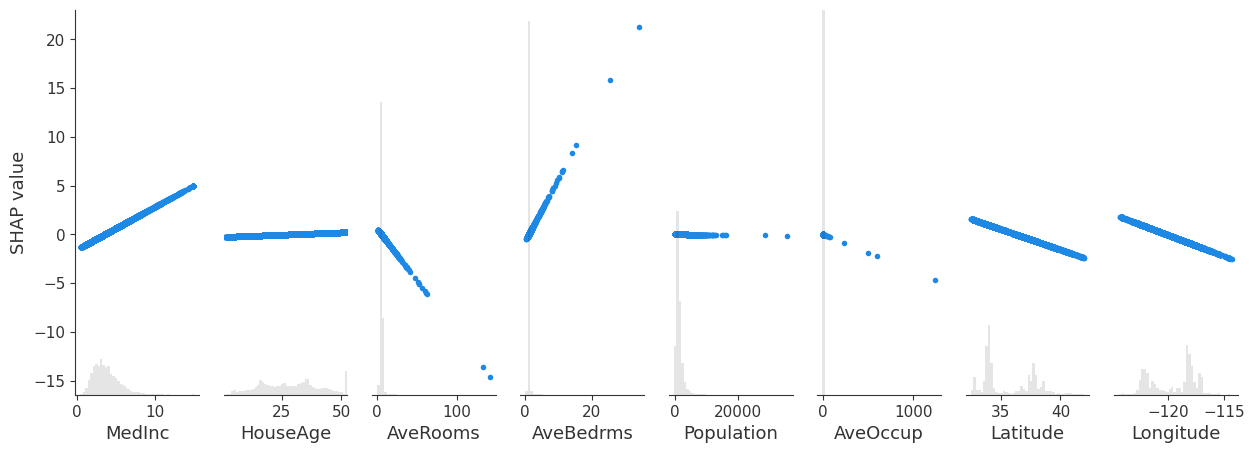

In [ ]:
shap.plots.scatter(shap_values)

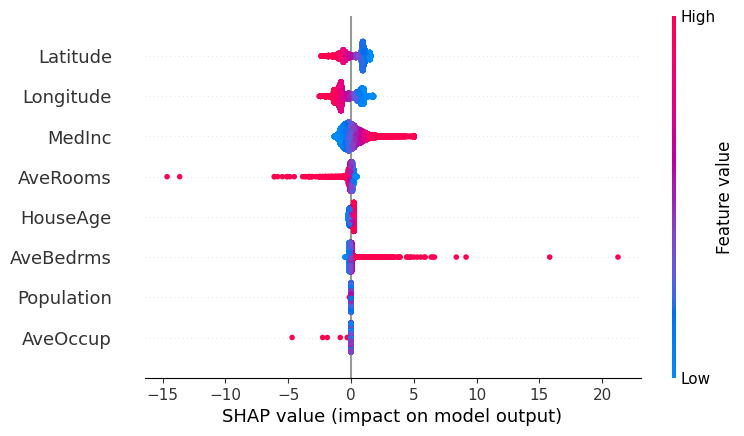

In [ ]:
shap.plots.beeswarm(shap_values)

Zastosowaliśmy explainer na 5000 próbek ze zbioru California.
Wyniki analizy SHAP częściowo pokryły się z wnioskami wysnutymi z wartości wag jednak atrybut AveBedrms o najwyższej wartości wagi nie okazał się tak istotny z perspektywy SHAP.
Najbardziej wpływowe atrybuty według wag:
- AveBedrms
- MedInc
- Longitude
- Latitude

Najbardziej wpływowe atrybuty według SHAP:
- Latitude
- Longitude
- MedInc
- AveRooms

Co do najmniej wpływowych atrybutów wyniki SHAP pokryły się z wartościami wag.

# Wyjaśnienia z użyciem addytywnego modelu regresyjnego

W modelu liniowym podkreślone zostało, że wpływy niezależnych od siebie atrybutów są sumowane w celu wyliczenia końcowej wartości modelu.

Ten addytywny charakter nie będzie właściwy dla każdego zagadnienia czy modelu. Konieczne może być zastosowanie uogólnionych modeli addytywnych (ang. *generalized additive models* GAM). W bibliotece `InterpretML` do treningu oraz interpretacji GAM dedykowane są wyjaśnialne maszyny wzmacniające (ang. *explainable boosting machines*).

Poniżej dla porównania wyświetlane są ponownie wykresy z pierwszej części: `model_ebm` to uogólniony model addytywny, `model` to liniowy model pierwszego rzędu.

**UWAGA**: wyuczone modele zwracać będą dla tej samej próbki różne odpowiedzi, ze względu na swoje zdolności zamodelowania zależności ze zbioru uczącego, ich `accuracy` lub `MSE` w ogólności **różnią się**.

## Wyuczenie modelu EBM

In [ ]:
import interpret.glassbox
# model EB to szklana skrzynka:

model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# wyjaśnienie modelu za pomocą shap.Explainer
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)


ExactExplainer explainer:  99%|█████████▉| 438/442 [00:15<00:00, 31.11it/s]
ExactExplainer explainer: 443it [00:15, 10.88it/s]                         


## Wyuczenie modelu wzmacnianego drzewa nieaddytywnego

In [ ]:
# train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

[13:15:19] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


## Interpretacja modeli

Te same metody, które użyto dla modelu liniowego, zastosowane mogą być dla dowolnego innego modelu.

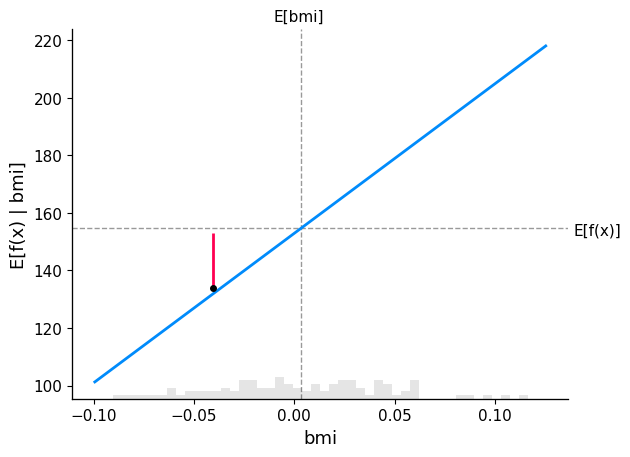

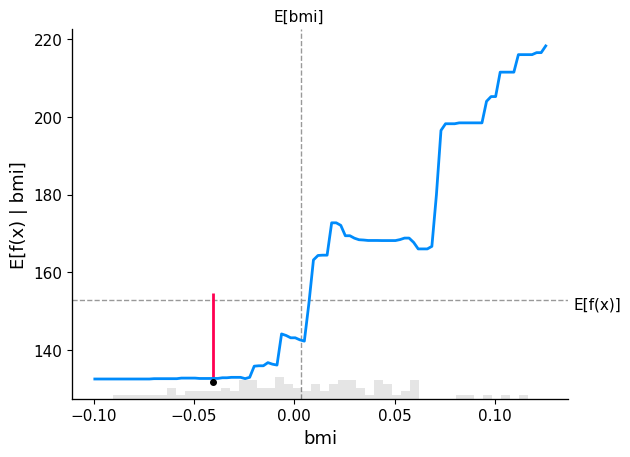

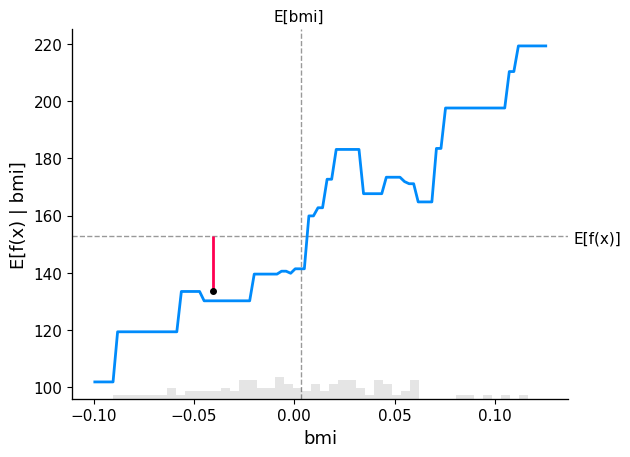

In [ ]:
feature = "bmi"
sample_ind = 5
shap.partial_dependence_plot(
    feature, model.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)
shap.partial_dependence_plot(
    feature, model_ebm.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=True,ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)
shap.partial_dependence_plot(
    feature, model_xgb.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=True, ice=False,
    shap_values=shap_values_xgb[sample_ind:sample_ind+1,:]
)

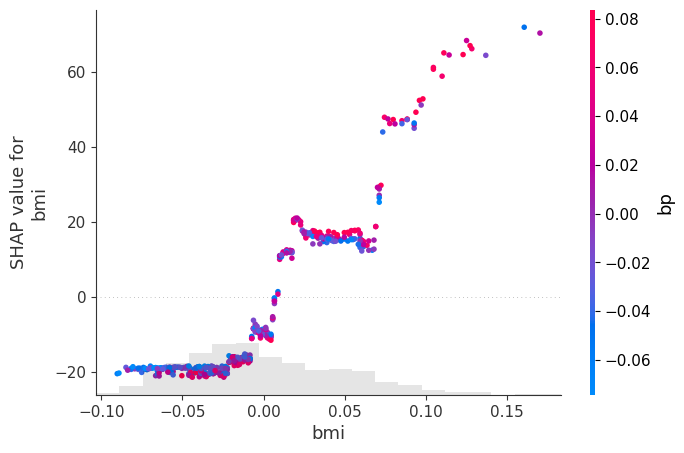

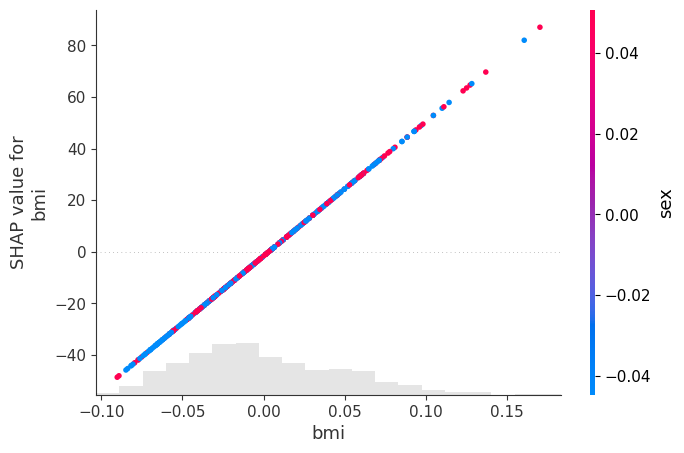

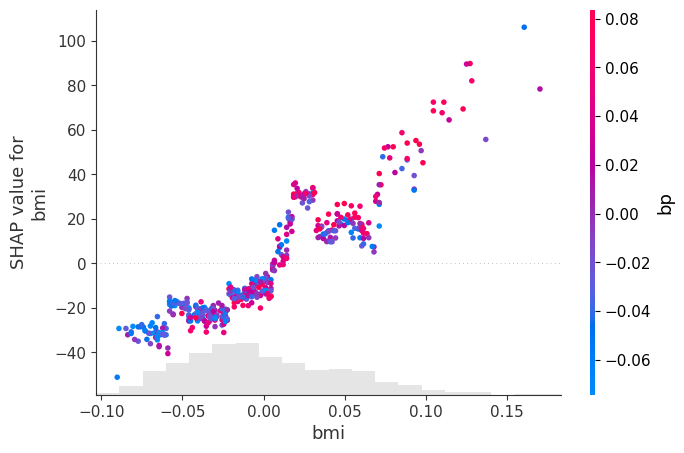

In [ ]:
shap.plots.scatter(shap_values_ebm[:,feature], color=shap_values)
shap.plots.scatter(shap_values[:,feature], color=shap_values)
shap.plots.scatter(shap_values_xgb[:,feature], color=shap_values)

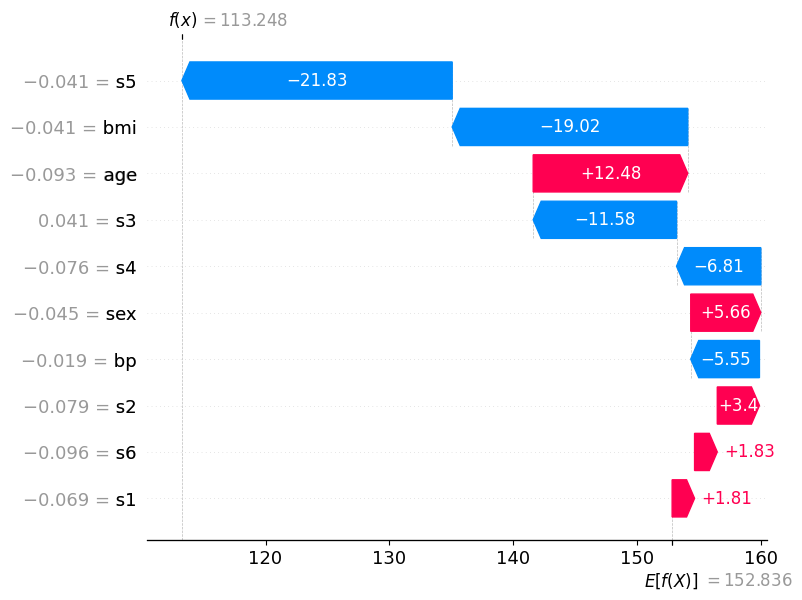

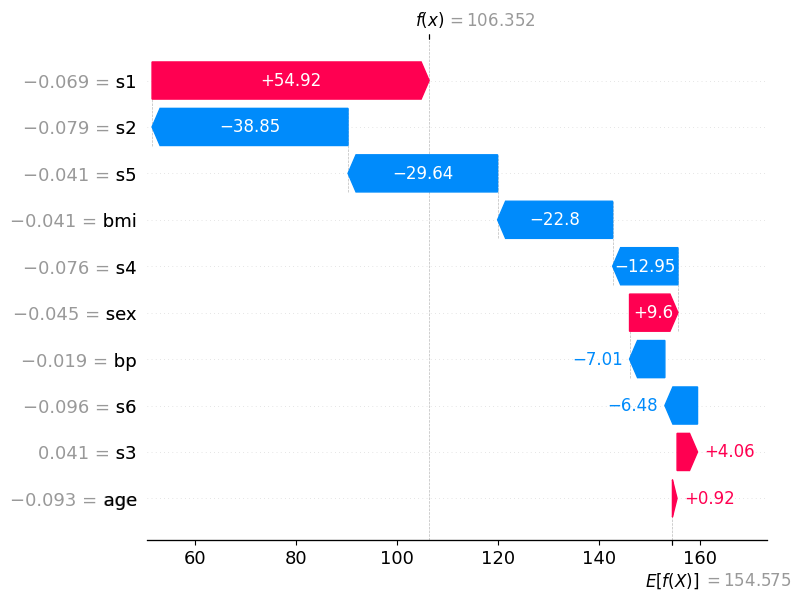

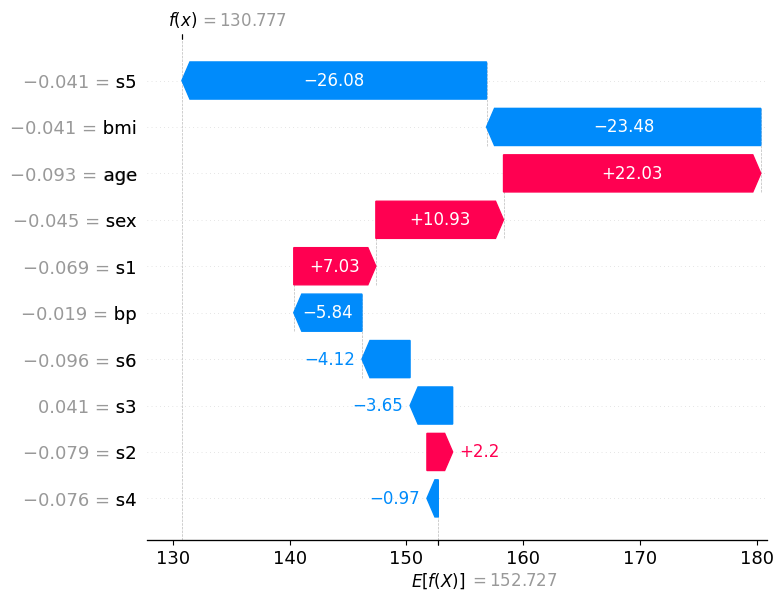

In [ ]:
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=14)
shap.plots.waterfall(shap_values[sample_ind], max_display=14)
shap.plots.waterfall(shap_values_xgb[sample_ind], max_display=14)

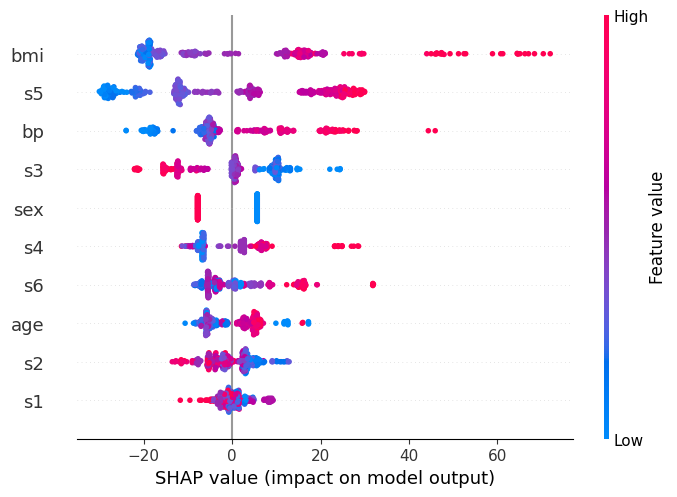

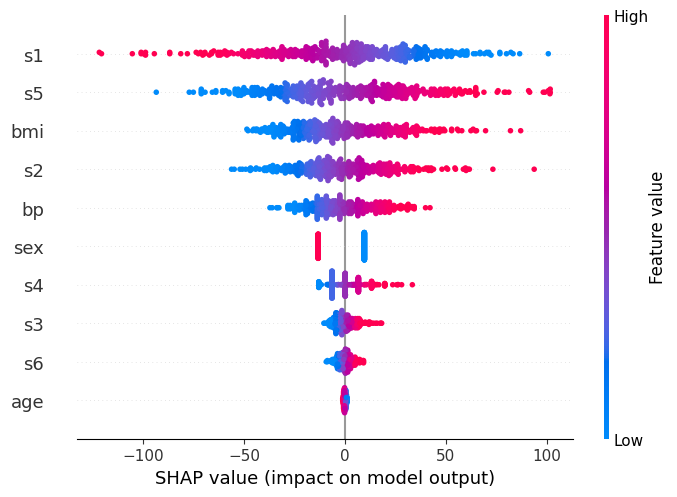

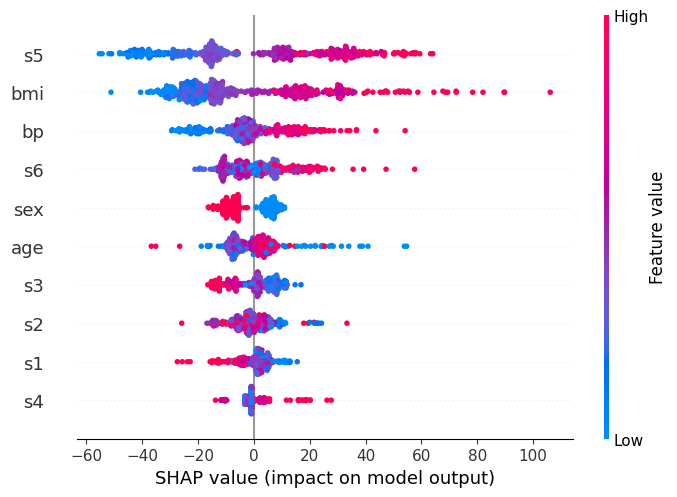

In [ ]:
shap.plots.beeswarm(shap_values_ebm, max_display=14)
shap.plots.beeswarm(shap_values, max_display=14)
shap.plots.beeswarm(shap_values_xgb, max_display=14)

## Zadanie do wykonania

Zmodyfikować należy kod interpretacji zamieszczony powyżej tak, aby wizualizowane były wszystkie trzy modele (dodać scatter, waterfall i beaswarm dla `model_xgb`).

Opisać należy zauważone różnice, szczególnie w **globalnym wyjaśnianiu** (w kolejności atrybutów) tych trzech różnych modeli.

Zaobserwować i napisać: czy jest atrybut, który w przypadku wielu modeli jest zawsze istotny lub zawsze nieistotny. Jak wygląda "pierwsza piątka" najistotniejszych atrybutów, jakie ma elementy wspólne między modelami.

W globalnej analizie SHAP wyniki dla modeli ebm oraz xgb są do siebie nieco zbliżone. Ranking TOP 5 atrybutów tych modeli różnił się tylko jedym atrybutem. Kolejność atrybutów również była zbliżona z tym że według modelu ebm najistotniejszym atrybutem było bmi, a według xgm był to s5. Model liniowy znacząco różni się wynikami od modeli wzmocnionych jednak również posiada z nimi wspólne atrybuty w TOP 5. Największą różnicą pomiędzy modelem liniowym a modelami wzmocnionymi jest istotność atrybutów s1 i s2. Model liniowy uznał je za bardzo wpływowe, podczas gdy modele ebm oraz xgb uznały je za jedne z najmniej istotnych.

Istnieją 2 atrybuty wspólne w TOP 5 dla wszystkich modeli:
- bmi
- bp

Atrybuty te są bardzo istotne dla wszystkich modeli.

# Wykorzystanie SHAP w interpretacji klasyfikatorów obrazów

Zaimportowane zostają wymagane biblioteki, wykorzystany zostanie pre-trenowany model klasyfikacji obiektów w obrazie oraz zbiór danych.

In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap
#from google.colab.patches import cv2_imshow #wykorzystać jeśli zachodzi potrzeba użycia cv.imshow

In [ ]:
#Wykorzystany zostanie pre-trenowany model ResNet dla zbioru danych imagenet
modelRes50 = ResNet50(weights='imagenet')
X_im, y_im = shap.datasets.imagenet50()

102967424/102967424 [==============================] - 0s 0us/step


In [ ]:
# importowanie klas
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

Utworzony zostaje obiekt `explainer`, do którego później podawane są pojedyncze próbki do interpretacji.

In [ ]:
# f to funkcja przyjmująca jako argument surowe dane obrazu, dokonująca wstępnego przetwarzania i klasyfikacji modelem
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return modelRes50(tmp)

# na potrzeby wizualizacji definiowana jest maska graficzna nakładana na obraz (typ i rozmiar w argumentach wywołania)
masker = shap.maskers.Image("inpaint_telea", X_im[0].shape)

explainer = shap.Explainer(f, masker, output_names=class_names)



## Wyjaśnienie istotności obszarów obrazu dla podejmowanej decyzji

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.13s/it]               


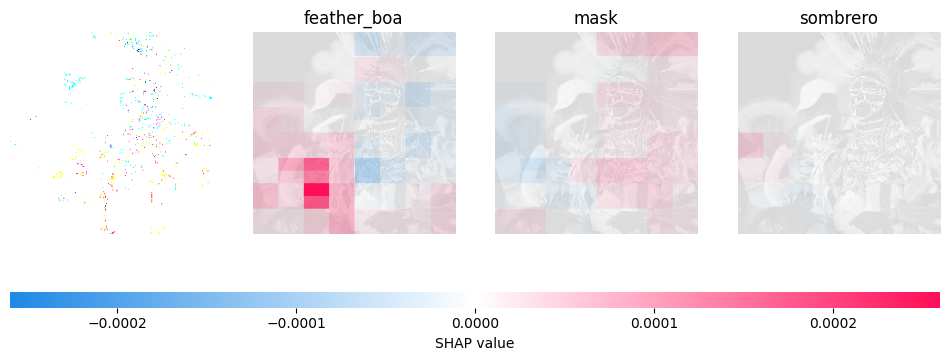

In [ ]:
# zapis 7:8 oznacza jedną próbkę, slice z X_im.
# UWAGA, outputs musi mieć co najmniej rozmiar 2, zapis [:3] oznacza wizualizację pierwszych trzech najsilniejszych odpowiedzi modelu
shap_values = explainer(X_im[7:8],
                        outputs=shap.Explanation.argsort.flip[:3])
# najmocniejsze odpowiedzi modelu z naniesionymi maskami istotności regionów
shap.image_plot(shap_values)

Argument `max_evals`, domyślnie `=500` może zostać zmieniony, wpływając na szczegółowość maski wyjaśniającej wpływ obszarów obrazu na decyzję. Liczba ewaluacji wpływa na dokładność wartości SHAP dla regionów obrazu.

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:35, 35.00s/it]               


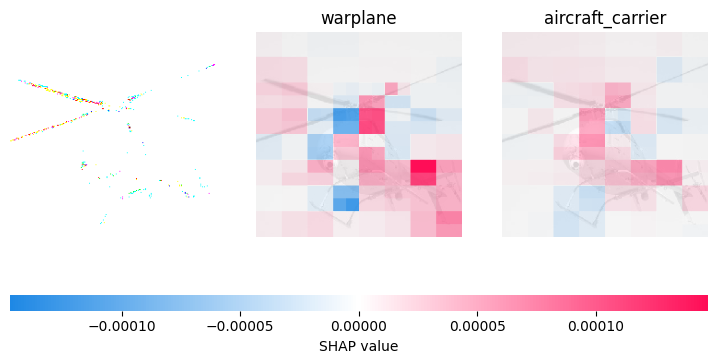

In [ ]:
shap_values = explainer(X_im[19:20], max_evals=1000,#nie zwiększać powyżej 1000
                        outputs=shap.Explanation.argsort.flip[:2])
shap.image_plot(shap_values)

PartitionExplainer explainer: 8it [00:15,  5.14s/it]


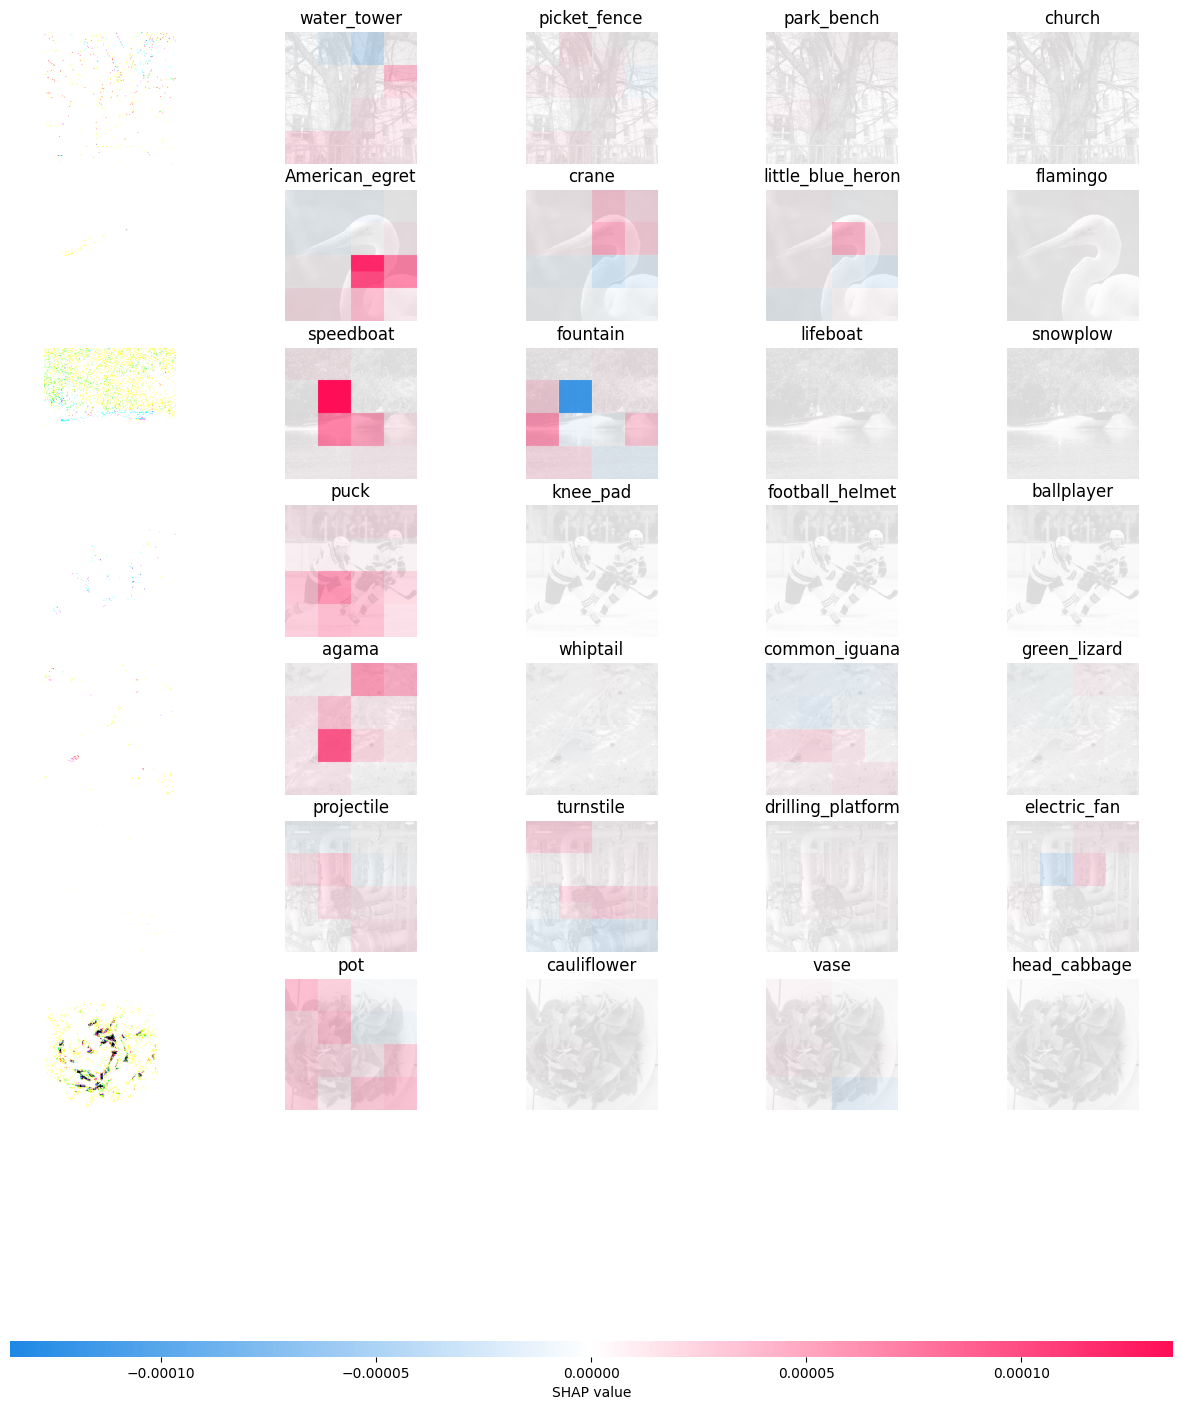

In [ ]:
shap_values = explainer(X_im[:7], max_evals=50,#nie zwiększać powyżej 1000
                        outputs=shap.Explanation.argsort.flip[:4])
shap.image_plot(shap_values)

In [ ]:
from PIL import Image
import requests
from io import BytesIO

def classify_image(url):
  response = requests.get(url)
  img = np.array(Image.open(BytesIO(response.content)))
  # img = img.reshape(-1, img.shape[-1])
  img = img[16:-16, 16:-16, :]
  img = img.reshape(1, 224, 224, 3)
  shap_values = explainer(img, outputs=shap.Explanation.argsort.flip[:3])
  shap.image_plot(shap_values)

classify_image("https://labelerrors.com/static/imagenet/val/n01740131/ILSVRC2012_val_00023975.JPEG")

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.80s/it]               


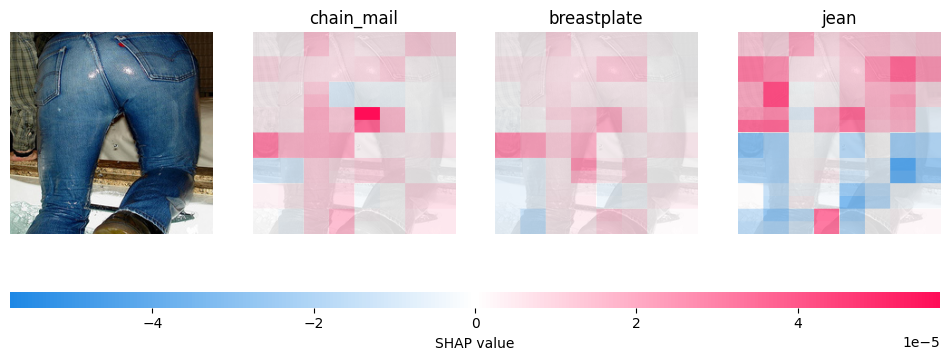

In [ ]:
classify_image("https://labelerrors.com/static/imagenet/val/n04493381/ILSVRC2012_val_00026655.JPEG")

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.99s/it]               


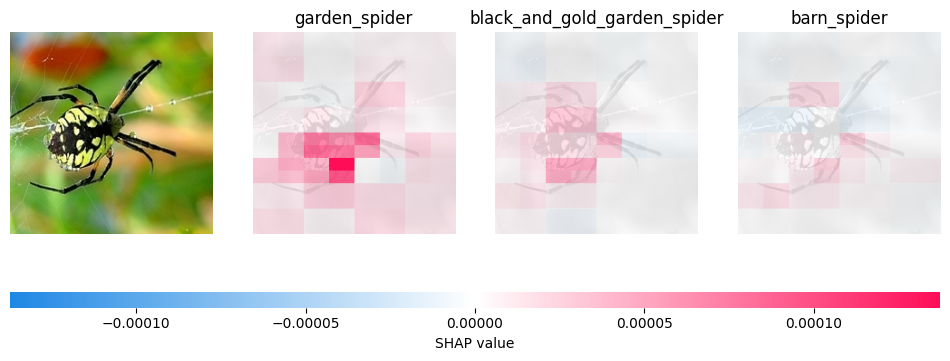

In [ ]:
classify_image("https://labelerrors.com/static/imagenet/val/n01776313/ILSVRC2012_val_00004095.JPEG")

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:20, 20.74s/it]               


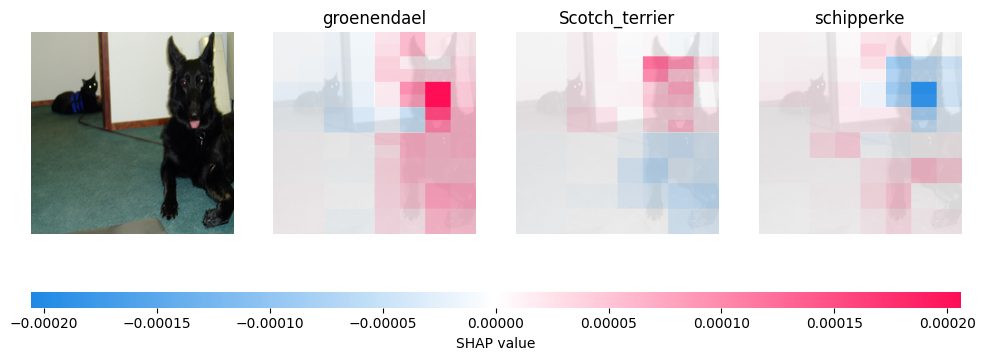

In [ ]:
classify_image("https://labelerrors.com/static/imagenet/val/n02115641/ILSVRC2012_val_00007782.JPEG")

## Zadanie do wykonania

Należy wytypować kilka obrazów, dla których decyzja jest właściwa oraz kilka z błędną decyzją. Skomentować pisemnie co było powodem podjęcia przez model niewłaściwej decyzji, np. "silne podobieństwo obszaru istotnego do innej klasy", "niska jakość", "nieczytelny obraz", itd. Posiłkować można się przykładami ze strony https://labelerrors.com/

W przypadku zdjęcia z wężem oraz pająkiem ogrodowym model podjął dobre decyzję. W obu przypadkach rejonem obrazu kluczowym dla podjęcia decyzji był centralny punkt obrazu.

W przypadku zdjęcia z psem model pomylił się, ponieważ pomylił psa na zdjęciu z bardzo podobną rasą. Kluczowym rejonem obrazu dla podjęcia decyzji był pysk psa. Prawidłowa klasa została wskazana jako 3 z kolei.

W przypadku zdjęcia z jeansami prawidłowa klasa została wskazana jako 3 z kolei, więc model również się pomylił. Model wskazał na kolczugę koncentrując się głównie na okolicach kroku.


# Podsumowanie

Wyjaśnienia tego typu stają się użyteczne dopiero w kontekście użycia systemu w praktyce - model popełnia błędy, po interpretacji jego odpowiedzi uzyskuje się istotne wskazówki co przyczyniło się do decyzji. Wówczas możliwe jest eliminowanie cech lub poprawa zbioru (wierszy tabeli, obrazów) i poprawa działania modelu.

-----

<center><img src='https://drive.google.com/uc?id=1PioHCAlQTt8LWChoMysPErSOrxOfAW0R'></center>